# Chapter 4: Monte Carlo Simulation & Sensitivity Analysis

## Central Limit Theorem

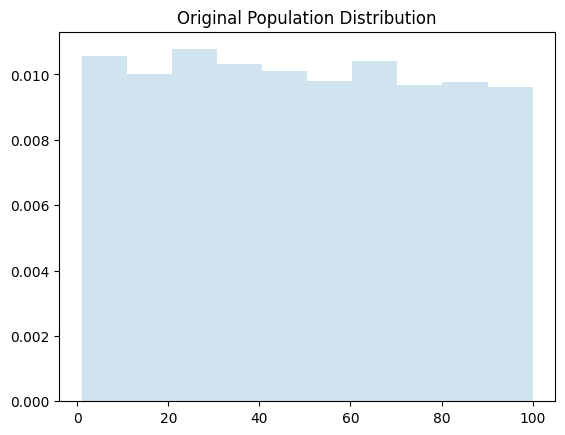

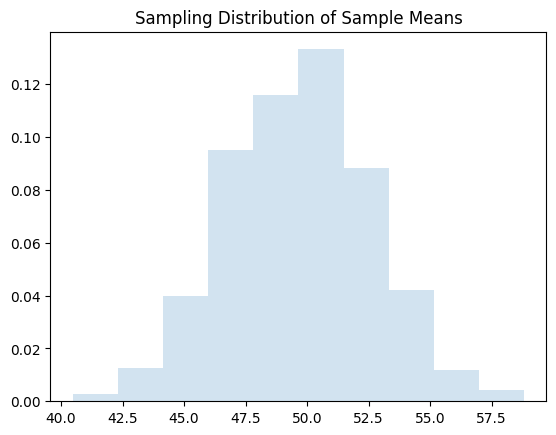

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

a = 1
b = 100
N = 10000
DataPop = list(np.random.uniform(a, b, N))
plt.hist(DataPop, density=True, histtype='stepfilled', alpha=0.2)
plt.title("Original Population Distribution")
plt.show()

SamplesMeans = []
for i in range(1000):
    DataExtracted = random.sample(DataPop, k=100)
    DataExtractedMean = np.mean(DataExtracted)
    SamplesMeans.append(DataExtractedMean)

plt.hist(SamplesMeans, density=True, histtype='stepfilled', alpha=0.2)
plt.title("Sampling Distribution of Sample Means")
plt.show()

## Cross Entropy

P = 1.000 Q = 1.000


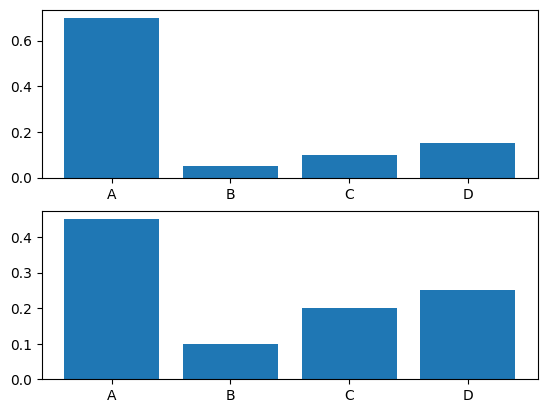

H(P, Q) =  1.505 bits


In [6]:
from matplotlib import pyplot
from math import log2

events = ['A', 'B', 'C','D']
p = [0.70, 0.05, 0.10, 0.15]
q = [0.45, 0.10, 0.20, 0.25]
print(f'P = {sum(p):.3f}', f'Q = {sum(q):.3f}')

pyplot.subplot(2,1,1)
pyplot.bar(events, p)
pyplot.subplot(2,1,2)
pyplot.bar(events, q)
pyplot.show()

def cross_entropy(p, q):
    return -sum([p*log2(q) for p, q in zip(p, q)])

h_pq = cross_entropy(p, q)
print(f'H(P, Q) =  {h_pq:.3f} bits')

## Cross Entropy Loss Function

In [7]:
import numpy as np

y = np.array([1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0])
p = np.array([0.8, 0.1, 0.9, 0.2, 0.8, 0.1, 0.7, 0.3, 0.6, 0.4])

ce_loss = -sum(y*np.log(p)+(1-y)*np.log(1-p))
ce_loss = ce_loss/len(p)
print(f'Cross Entropy Loss =  {ce_loss:.3f} nats')

Cross Entropy Loss =  0.272 nats


## Numerical Integration (Monte Carlo Method)

Numerical integration = 8.996787006398996


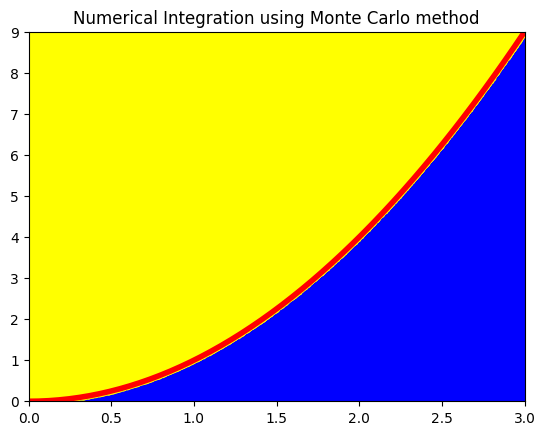

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(2)
f = lambda x: x**2
a = 0.0
b = 3.0
NumSteps = 1000000
XIntegral = []
YIntegral = []
XRectangle = []
YRectangle = []

ymin = f(a)
ymax = ymin
for i in range(NumSteps):
    x = a + (b - a) * float(i) / NumSteps
    y = f(x)
    ymin = min(y, ymin)
    ymax = max(y, ymax)

A = (b - a) * (ymax - ymin)
N = 1000000
M = 0
for k in range(N):
    x = a + (b - a) * random.random()
    y = ymin + (ymax - ymin) * random.random()
    if y <= f(x):
        M += 1
        XIntegral.append(x)
        YIntegral.append(y)
    else:
        XRectangle.append(x)
        YRectangle.append(y)

NumericalIntegral = M / N * A
print("Numerical integration = " + str(NumericalIntegral))

XLin = np.linspace(a, b)
YLin = [f(x) for x in XLin]

plt.axis([0, b, 0, f(b)])
plt.plot(XLin, YLin, color="red", linewidth=4)
plt.scatter(XIntegral, YIntegral, color="blue", marker=".")
plt.scatter(XRectangle, YRectangle, color="yellow", marker=".")
plt.title("Numerical Integration using Monte Carlo method")
plt.show()

## Sensitivity Analysis (Mockup Only)

In [9]:
# Example sensitivity function
import numpy as np
import math

def my_func(x_1, x_2, x_3):
    return math.log(x_1/ x_2 + x_3)

x_1 = np.arange(10, 100, 10)
x_2 = np.arange(1, 10, 1)
x_3 = np.arange(1, 10, 1)

print("Run external SensitivityAnalyzer if available with input dict:")
print({'x_1':x_1.tolist(), 'x_2':x_2.tolist(), 'x_3':x_3.tolist()})
print("Function output example:", my_func(20, 2, 3))

Run external SensitivityAnalyzer if available with input dict:
{'x_1': [10, 20, 30, 40, 50, 60, 70, 80, 90], 'x_2': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'x_3': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
Function output example: 2.5649493574615367


# ** The Pi estimation**

N=10000 M=7847 Pi=3.14


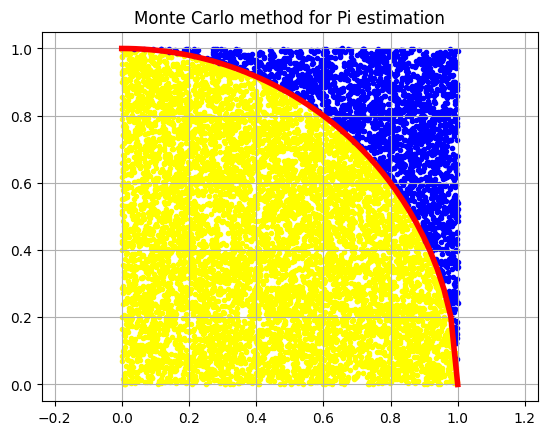

In [10]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

N = 10000
M = 0

XCircle=[]
YCircle=[]
XSquare=[]
YSquare=[]

for p in range(N):
    x=random.random()
    y=random.random()
    if(x**2+y**2 <= 1):
        M+=1
        XCircle.append(x)
        YCircle.append(y)
    else:
        XSquare.append(x)
        YSquare.append(y)

Pi = 4*M/N

print("N=%d M=%d Pi=%.2f" %(N,M,Pi))

XLin=np.linspace(0,1)
YLin=[]
for x in XLin:
    YLin.append(math.sqrt(1-x**2))

plt.axis   ("equal")
plt.grid   (which="major")
plt.plot   (XLin , YLin, color="red" , linewidth="4")
plt.scatter(XCircle, YCircle, color="yellow", marker   =".")
plt.scatter(XSquare, YSquare, color="blue"  , marker   =".")
plt.title  ("Monte Carlo method for Pi estimation")

plt.show()